In [1]:
import kan
import kan.utils as ku
import numpy as np
import torch.nn as nn
import torch
import qutip as qt
from libraries import utils
from libraries import magnetization
from libraries import j1j2_functions

In [26]:
N=10; J1=1
# there seem to be 5 distinct phases of deviating string amounts
J2s = [0.0, 0.2, 0.29, 0.32, 0.4] # numbered phases 1-4 (J2=0 is phase 0)
gss = [qt.qload(f'../J1J2_info/N10/n{N}gs_J2_{J2}') for J2 in J2s]
states = utils.get_nonzero_states(N, gss[0], 1e-10)[0]
signs = [utils.get_nonzero_states(N, gs, 1e-10)[1] for gs in gss]

In [27]:
nd = 0b0101010101 # this never deviates, let this be of negative sign (note this fulfills cos(amp * pi/4 + phase + pi / 2))
index = states.index(nd)
print(nd)
for i in range(len(signs)):
    if signs[i][index] > 0:
        signs[i] = -1 * np.array(signs[i])
    else:
        signs[i] = np.array(signs[i])

341


In [28]:
def rfft(x):
    x = (-1) ** np.array(x)
    return np.fft.rfft(x)[1:]

input = utils.generate_input_samples(N, states)
print(input.shape)
ft_input = []
for x in input:
    amp_phase = []
    ft = rfft(x)
    for c in ft:
        amp_phase.append(np.abs(c))
        amp_phase.append(np.angle(c) % (2 * np.pi))
    ft_input.append(amp_phase)
ft_input = torch.tensor(ft_input)

torch.Size([252, 10])


C:\Users\taoha\AppData\Local\Temp\ipykernel_5144\2939947991.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  x = (-1) ** np.array(x)


In [90]:
phase = 1; lamb=1.5e-3

reg_metric='edge_forward_spline_n'; lamb_l1=1.; lamb_entropy=2.; lamb_coef=0.; lamb_coefdiff=0.

msr_vec = torch.tensor([0] * (N - 2) + [np.pi / 4, 1]).reshape(-1, 1)
k1 = kan.KAN(width=[10, 1], seed=2)
opt = kan.LBFGS(k1.parameters(), lr = 1)
epochs = 50; datarate = 5
for i in range(epochs):
    def closure():
        opt.zero_grad()
        pred = torch.cos(ft_input @ msr_vec + torch.pi / 2 + k1(ft_input))
        loss = torch.mean((pred - torch.tensor(signs[phase].reshape(-1, 1))) ** 2) + lamb * k1.get_reg(reg_metric, lamb_l1, lamb_entropy, lamb_coef, lamb_coefdiff)
        loss.backward()
        return loss
    loss = opt.step(closure)
    if i % datarate == 0:
        print(loss.item())
print(loss.item())

checkpoint directory created: ./model
saving model version 0.0
2.436366558074951
0.01157146506011486
0.011722033843398094
0.011560842394828796
0.01172007154673338
0.012038445100188255
0.010709987953305244
0.010531416162848473
0.010346800088882446
0.010172109119594097
0.011552161537110806


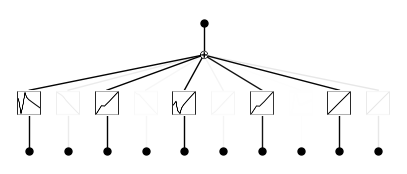

In [91]:
k1.plot()

In [92]:
k1 = k1.prune()

saving model version 0.1


In [93]:
epochs = 50; datarate = 5
for i in range(epochs):
    def closure():
        opt.zero_grad()
        pred = torch.cos(ft_input @ msr_vec + torch.pi / 2 + k1(ft_input))
        loss = torch.mean((pred - torch.tensor(signs[phase].reshape(-1, 1))) ** 2) + lamb * k1.get_reg(reg_metric, lamb_l1, lamb_entropy, lamb_coef, lamb_coefdiff)
        loss.backward()
        return loss
    loss = opt.step(closure)
    if i % datarate == 0:
        print(loss.item())
print(loss.item())

0.010915566235780716
0.010915566235780716
0.010915566235780716
0.010915566235780716
0.010915566235780716
0.010915566235780716
0.010915566235780716
0.010915566235780716
0.010915566235780716
0.010915566235780716
0.010915566235780716


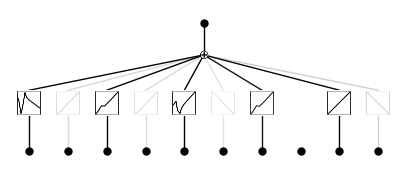

In [94]:
k1.plot()

In [95]:
for i in range(1, N, 2):
    k1.fix_symbolic(0, i, 0, '0');

Best value at boundary.
r2 is 0.0
r2 is not very high, please double check if you are choosing the correct symbolic function.
saving model version 0.2
Best value at boundary.
r2 is 0.0
r2 is not very high, please double check if you are choosing the correct symbolic function.
saving model version 0.3
Best value at boundary.
r2 is 0.0
r2 is not very high, please double check if you are choosing the correct symbolic function.
saving model version 0.4
Best value at boundary.
r2 is 0.0
r2 is not very high, please double check if you are choosing the correct symbolic function.
saving model version 0.5
Best value at boundary.
r2 is 0.0
r2 is not very high, please double check if you are choosing the correct symbolic function.
saving model version 0.6


In [96]:
epochs = 50; datarate = 5
for i in range(epochs):
    def closure():
        opt.zero_grad()
        pred = torch.cos(ft_input @ msr_vec + torch.pi / 2 + k1(ft_input))
        loss = torch.mean((pred - torch.tensor(signs[phase].reshape(-1, 1))) ** 2) + lamb * k1.get_reg(reg_metric, lamb_l1, lamb_entropy, lamb_coef, lamb_coefdiff)
        loss.backward()
        return loss
    loss = opt.step(closure)
    if i % datarate == 0:
        print(loss.item())
print(loss.item())

0.009979956783354282
0.009979956783354282
0.009979956783354282
0.009979956783354282
0.009979956783354282
0.009979956783354282
0.009979956783354282
0.009979956783354282
0.009979956783354282
0.009979956783354282
0.009979956783354282


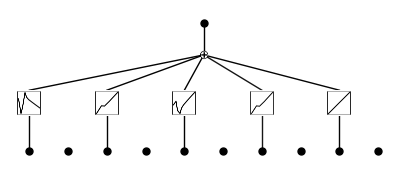

In [97]:
k1.plot()

In [98]:
for i in range(0, N, 2):
    k1.suggest_symbolic(0, i, 0, topk=10, weight_simple=0.3)

   function  fitting r2   r2 loss  complexity  complexity loss  total loss
0       tan    0.891388 -3.202605           3                3   -1.341824
1       1/x    0.823105 -2.498952           2                2   -1.149266
2     1/x^2    0.635441 -1.455736           2                2   -0.419015
3  gaussian    0.707466 -1.773274           3                3   -0.341292
4       cos    0.579223 -1.248837           2                2   -0.274186
5       sin    0.579212 -1.248799           2                2   -0.274159
6     1/x^3    0.652273 -1.523933           3                3   -0.166753
7         0    0.000000  0.000014           0                0    0.000010
8       x^2    0.367191 -0.660136           2                2    0.137905
9     1/x^4    0.622689 -1.406135           4                4    0.215705
    function  fitting r2   r2 loss  complexity  complexity loss  total loss
0          x    0.974270 -5.279840           1                1   -3.395888
1      x^0.5    0.97561

In [99]:
k1.fix_symbolic(0, 2, 0, 'x');
k1.fix_symbolic(0, 6, 0, 'x');
k1.fix_symbolic(0, 8, 0, 'x');
epochs = 50; datarate = 5
for i in range(epochs):
    def closure():
        opt.zero_grad()
        pred = torch.cos(ft_input @ msr_vec + torch.pi / 2 + k1(ft_input))
        loss = torch.mean((pred - torch.tensor(signs[phase].reshape(-1, 1))) ** 2) + lamb * k1.get_reg(reg_metric, lamb_l1, lamb_entropy, lamb_coef, lamb_coefdiff)
        loss.backward()
        return loss
    loss = opt.step(closure)
    if i % datarate == 0:
        print(loss.item())
print(loss.item())

r2 is 0.9742699265480042
saving model version 0.7
r2 is 0.9725514054298401
saving model version 0.8
r2 is 0.9999989867210388
saving model version 0.9
0.008550789207220078
0.008550789207220078
0.008550789207220078
0.008550789207220078
0.008550789207220078
0.008550789207220078
0.008550789207220078
0.008550789207220078
0.008550789207220078
0.008550789207220078
0.008550789207220078


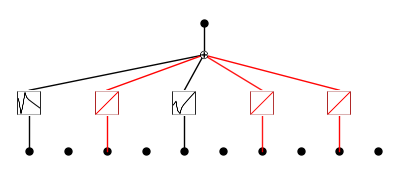

In [100]:
k1.plot()

In [101]:
ku.ex_round(k1.symbolic_formula()[0][0], 3)

0.31*x_3 + 0.182*x_7 + 0.253*x_9 + 1.38 - 1.873*exp(-2.435*(1 - 0.502*x_5)**2) + 1.111*exp(-9.0*(1 - 0.425*x_1)**2)

In [102]:
pred = torch.cos(ft_input @ msr_vec + torch.pi / 2 + k1(ft_input))
pred_manual = torch.cos(ft_input @ msr_vec + torch.pi / 2 + ft_input @ torch.tensor([0, 0, 0.31, 0, 0.368, 0, 0.182, 0, 0.253, 0]).reshape(-1, 1) + 0.17)
loss = torch.mean((torch.sgn(pred) - torch.tensor(signs[phase].reshape(-1, 1))) ** 2)
print(loss) # makes no mistakes
print(torch.mean((pred - pred_manual) ** 2))
loss_manual = torch.mean((torch.sgn(pred_manual) - torch.tensor(signs[phase].reshape(-1, 1))) ** 2)
print(loss_manual)

tensor(0., grad_fn=<MeanBackward0>)
tensor(0.0902, grad_fn=<MeanBackward0>)
tensor(0.1587)


In [110]:
def train(model, epochs, datarate, phase_num, lr=1, reg_metric='edge_forward_spline_n', lamb_l1=1., lamb_entropy=2., lamb_coef=0., lamb_coefdiff=0.):
    opt = torch.optim.LBFGS(model.parameters(), lr = lr)
    for i in range(epochs):
        def closure():
            opt.zero_grad()
            pred = torch.cos(ft_input @ msr_vec + torch.pi / 2 + model(ft_input))
            loss = torch.mean((pred - torch.tensor(signs[phase_num].reshape(-1, 1))) ** 2) + lamb * model.get_reg(reg_metric, lamb_l1, lamb_entropy, lamb_coef, lamb_coefdiff)
            loss.backward()
            return loss
        loss = opt.step(closure)
        if i % datarate == 0:
            print(loss.item())
    print(loss.item())

In [112]:
k1_lin = kan.KAN(width=[10, 1], seed=2)
k1_lin(ft_input)
for i in range(N):
    k1_lin.fix_symbolic(0, i, 0, 'x');
train(k1_lin, 50, 5, 1, lr=0.1)

checkpoint directory created: ./model
saving model version 0.0
r2 is 0.9985844492912292
saving model version 0.1
r2 is 0.9988006353378296
saving model version 0.2
r2 is 0.9978940486907959
saving model version 0.3
r2 is 0.9979860782623291
saving model version 0.4
r2 is 0.9994969964027405
saving model version 0.5
r2 is 0.9973929524421692
saving model version 0.6
r2 is 0.9973814487457275
saving model version 0.7
r2 is 0.9974532127380371
saving model version 0.8
r2 is 0.9999073147773743
saving model version 0.9
r2 is 1.0000009536743164
saving model version 0.10
2.425177574157715
0.03486599400639534
0.03462624177336693
0.03462624549865723
0.03462624549865723
0.03462624549865723
0.03462624549865723
0.03462624549865723
0.03462624549865723
0.03462624549865723
0.03462624549865723


In [114]:
ku.ex_round(k1_lin.symbolic_formula()[0][0], 3)

-0.078*x_1 - 0.001*x_10 + 0.002*x_2 + 0.183*x_3 + 0.018*x_4 + 0.223*x_5 - 0.006*x_6 + 0.277*x_7 - 0.e-3*x_8 + 0.159*x_9 + 0.762

In [117]:
k2_lin = kan.KAN(width=[10, 1], seed=2)
k2_lin(ft_input)
for i in range(N):
    k2_lin.fix_symbolic(0, i, 0, 'x');
train(k2_lin, 50, 5, 2, lr=0.1)

checkpoint directory created: ./model
saving model version 0.0
r2 is 0.9985844492912292
saving model version 0.1
r2 is 0.9988006353378296
saving model version 0.2
r2 is 0.9978940486907959
saving model version 0.3
r2 is 0.9979860782623291
saving model version 0.4
r2 is 0.9994969964027405
saving model version 0.5
r2 is 0.9973929524421692
saving model version 0.6
r2 is 0.9973814487457275
saving model version 0.7
r2 is 0.9974532127380371
saving model version 0.8
r2 is 0.9999073147773743
saving model version 0.9
r2 is 1.0000009536743164
saving model version 0.10
2.2003889083862305
0.05638532713055611
0.05557708814740181
0.05557708442211151
0.05557708442211151
0.05557708442211151
0.05557708442211151
0.05557708442211151
0.05557708442211151
0.05557708442211151
0.05557708442211151


In [118]:
ku.ex_round(k2_lin.symbolic_formula()[0][0], 3)

-0.161*x_1 + 0.266*x_3 - 0.01*x_4 + 0.469*x_5 + 0.005*x_6 + 0.174*x_7 - 0.012*x_8 + 0.253*x_9 - 0.234

In [122]:
k3_lin = kan.KAN(width=[10, 1], seed=0)
k3_lin(ft_input)
for i in range(N):
    k3_lin.fix_symbolic(0, i, 0, 'x');
train(k3_lin, 50, 5, 3, lr=0.1)

checkpoint directory created: ./model
saving model version 0.0
r2 is 0.9937489628791809
saving model version 0.1
r2 is 0.9982610940933228
saving model version 0.2
r2 is 0.9977597594261169
saving model version 0.3
r2 is 0.9989418983459473
saving model version 0.4
r2 is 0.9994174242019653
saving model version 0.5
r2 is 0.9989916086196899
saving model version 0.6
r2 is 0.9955157041549683
saving model version 0.7
r2 is 0.9992152452468872
saving model version 0.8
r2 is 0.9998950958251953
saving model version 0.9
r2 is 1.0000008344650269
saving model version 0.10
1.270880103111267
0.1660107970237732
0.12406478077173233
0.12406466901302338
0.12406466901302338
0.12406466901302338
0.12406466901302338
0.12406466901302338
0.12406466901302338
0.12406466901302338
0.12406466901302338


In [123]:
ku.ex_round(k3_lin.symbolic_formula()[0][0], 3)

0.706*x_1 - 0.009*x_2 + 0.091*x_3 - 0.001*x_4 - 0.108*x_5 - 0.013*x_6 - 0.069*x_7 + 0.003*x_8 - 0.146*x_9 - 3.58

In [127]:
k4_lin = kan.KAN(width=[10, 1], seed=2)
k4_lin(ft_input)
for i in range(N):
    k4_lin.fix_symbolic(0, i, 0, 'x');
train(k4_lin, 50, 5, 4, lr=0.2)
ku.ex_round(k4_lin.symbolic_formula()[0][0], 3)

checkpoint directory created: ./model
saving model version 0.0
r2 is 0.9985844492912292
saving model version 0.1
r2 is 0.9988006353378296
saving model version 0.2
r2 is 0.9978940486907959
saving model version 0.3
r2 is 0.9979860782623291
saving model version 0.4
r2 is 0.9994969964027405
saving model version 0.5
r2 is 0.9973929524421692
saving model version 0.6
r2 is 0.9973814487457275
saving model version 0.7
r2 is 0.9974532127380371
saving model version 0.8
r2 is 0.9999073147773743
saving model version 0.9
r2 is 1.0000009536743164
saving model version 0.10
1.9024263620376587
0.17230769991874695
0.17229129374027252
0.17229129374027252
0.17229129374027252
0.17229129374027252
0.17229129374027252
0.17229129374027252
0.17229129374027252
0.17229129374027252
0.17229129374027252


-0.221*x_1 - 0.001*x_10 + 0.002*x_2 + 1.257*x_3 + 0.015*x_4 + 0.78*x_5 + 0.002*x_6 + 1.344*x_7 + 0.013*x_8 + 0.612*x_9 - 3.548

In [137]:
type(signs[0])

numpy.ndarray

In [139]:
ft_input.shape
ft_j2 = torch.vstack(tuple(torch.hstack((ft_input, torch.tensor([J2] * 252).reshape(-1, 1))) for J2 in J2s))
labels_j2 = torch.vstack(tuple(torch.tensor(signs[i]).reshape(-1, 1) for i in range(len(signs))))
print(ft_j2.shape, labels_j2.shape)

torch.Size([1260, 11]) torch.Size([1260, 1])


In [140]:
ft_j2[:, 0:10]

tensor([[6.4721, 1.8850, 0.0000,  ..., 1.5708, 2.0000, 3.1416],
        [5.2361, 1.8850, 2.3511,  ..., 2.8274, 2.0000, 0.0000],
        [4.2979, 1.7151, 3.8042,  ..., 4.0841, 2.0000, 3.1416],
        ...,
        [4.2979, 4.8567, 3.8042,  ..., 0.9425, 2.0000, 0.0000],
        [5.2361, 5.0265, 2.3511,  ..., 5.9690, 2.0000, 3.1416],
        [6.4721, 5.0265, 0.0000,  ..., 4.7124, 2.0000, 0.0000]])

In [ ]:
def train_all(model, epochs, datarate, lamb=1e-2, lr=1, reg_metric='edge_forward_spline_n', lamb_l1=1., lamb_entropy=2., lamb_coef=0., lamb_coefdiff=0.):
    opt = torch.optim.LBFGS(model.parameters(), lr = lr)
    for i in range(epochs):
        def closure():
            opt.zero_grad()
            pred = torch.cos(ft_j2[:, 0:N] @ msr_vec + torch.pi / 2 + ft_j2[:, -1] * model(ft_j2[:, 0:N]))
            loss = torch.mean((pred - labels_j2) ** 2) + lamb * model.get_reg(reg_metric, lamb_l1, lamb_entropy, lamb_coef, lamb_coefdiff)
            loss.backward()
            return loss
        loss = opt.step(closure)
        if i % datarate == 0:
            print(loss.item())
    print(loss.item())

In [154]:
k_all = kan.KAN(width=[N, 1], seed=1)
k_all(ft_j2)
for i in range(N):
    k_all.fix_symbolic(0, i, 0, 'x');
train_all(k_all, 50, 5, lr=0.1);

checkpoint directory created: ./model
saving model version 0.0
r2 is 0.9994818568229675
saving model version 0.1
r2 is 0.9967817664146423
saving model version 0.2
r2 is 0.9975941181182861
saving model version 0.3
r2 is 0.924655556678772
saving model version 0.4
r2 is 0.9993412494659424
saving model version 0.5
r2 is 0.9979274272918701
saving model version 0.6
r2 is 0.9973252415657043
saving model version 0.7
r2 is 0.9971182942390442
saving model version 0.8
r2 is 0.9998698830604553
saving model version 0.9
r2 is 1.0000011920928955
saving model version 0.10
3.3345754146575928
1.589220643043518
1.58907151222229
1.5890703201293945
1.5890709161758423
1.5890709161758423
1.5890709161758423
1.5890709161758423
1.5890709161758423
1.5890709161758423
1.5890709161758423


In [155]:
k_all(ft_j2)

tensor([[222.4574],
        [295.1902],
        [278.5765],
        ...,
        [327.0168],
        [294.2804],
        [278.2500]], grad_fn=<AddBackward0>)